<a href="https://colab.research.google.com/github/DommiiUdomp/-/blob/main/Weight_Initializers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weight and bias initialisers**




*In this reading we investigate different ways to initialise weights and biases in the layers of neural networks.*

In [ ]:
%matplotlib inline
import tensorflow as tf
import pandas as pd

*The different initialisations available in Keras.*

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D

In [ ]:
model = Sequential ( [ 
                      Conv1D ( filters = 1 , kernel_size = 3, input_shape = (128, 64) , kernel_initializer= 'random_uniform' , bias_initializer= 'zeros' ,
                              activation = 'relu') ,
                      MaxPooling1D ( pool_size= 4) ,
                      Flatten () , 
                      Dense (64, kernel_initializer= 'he_uniform' , bias_initializer = 'ones' , activation = 'relu')
])

In [ ]:
#add some layers to the model

model.add ( Dense ( 64, kernel_initializer= tf.keras.initializers.RandomNormal (mean = 0.0 , stddev= 0.05) , 
                   bias_initializer = tf.keras.initializers.Constant (value = 0.4) ,
                   activation = 'relu' )  )
model.add ( Dense (8 , kernel_initializer= tf.keras.initializers.Orthogonal (gain = 1.0 , seed = None) , 
                   bias_initializer = tf.keras.initializers.Constant (value = 0.4) ,
                   activation = 'relu' )  )

*Custom weight and bias initialisers*

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
# Define a custom initializer

def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model.add(Dense(64, kernel_initializer=my_init))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 1)            193       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 1)             0         
_________________________________________________________________
flatten (Flatten)            (None, 31)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                2048      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5

In [ ]:
import matplotlib.pyplot as plt


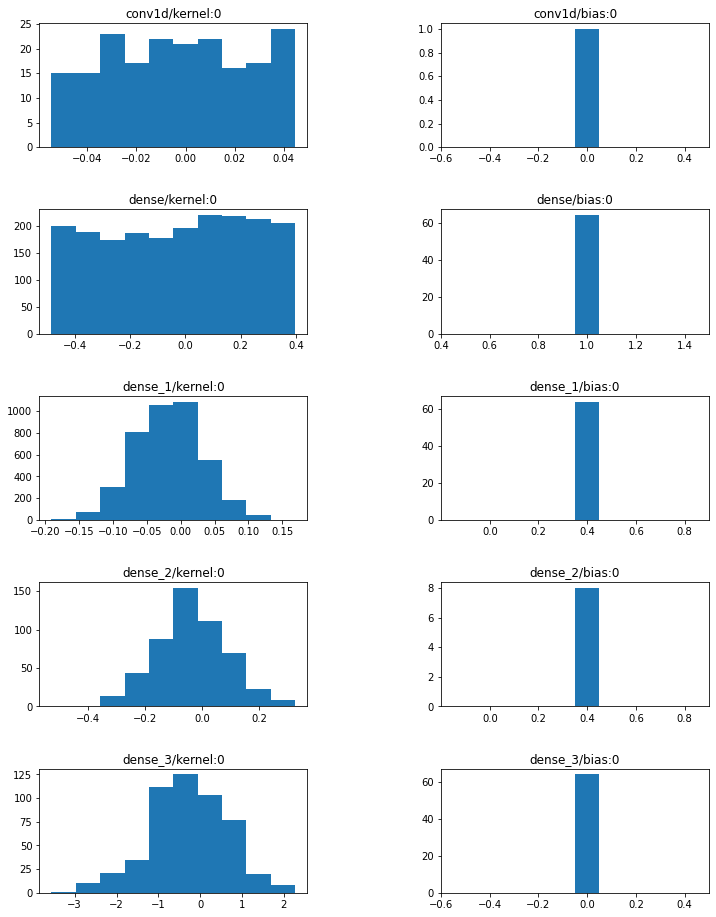

In [ ]:
#plot histogram of weight and bias values

fig, axes = plt.subplots ( 5, 2 , figsize = (12, 16))
fig.subplots_adjust (hspace = 0.5 , wspace = 0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers) :
  for j in [0,1] :
    axes [i,j].hist( layer.weights [j].numpy().flatten() , align = 'left')
    axes [i,j].set_title( layer.weights[j].name)

Arguments

**RandomNormal class**

***mean***: a python scalar or a scalar tensor. Mean of the random values to generate.

***stddev***: a python scalar or a scalar tensor. Standard deviation of the random values to generate.

***seed***: A Python integer. An initializer created with a given seed will always produce the same random tensor for a given shape and dtype.

**RandomUniform class**

***minval***: A python scalar or a scalar tensor. Lower bound of the range of random values to generate (inclusive).

***maxval***: A python scalar or a scalar tensor. Upper bound of the range of random values to generate (exclusive).

***seed***

**TruncatedNormal class**

mean: 
stddev: 
seed: 

Zeros class // Ones class // GlorotNormal class // GlorotUniform class // HeNormal class // HeUniform class // Identity class // Orthogonal class // Constant class // VarianceScaling class // 
